# Activity: Build a random forest model

## **Introduction**


As you're learning, random forests are popular statistical learning algorithms. Some of their primary benefits include reducing variance, bias, and the chance of overfitting.

This activity is a continuation of the project you began modeling with decision trees for an airline. Here, you will train, tune, and evaluate a random forest model using data from spreadsheet of survey responses from 129,880 customers. It includes data points such as class, flight distance, and inflight entertainment. Your random forest model will be used to predict whether a customer will be satisfied with their flight experience.

**Note:** Because this lab uses a real dataset, this notebook first requires exploratory data analysis, data cleaning, and other manipulations to prepare it for modeling.

## **Step 1: Imports** 


Import relevant Python libraries and modules, including `numpy` and `pandas`libraries for data processing; the `pickle` package to save the model; and the `sklearn` library, containing:
- The module `ensemble`, which has the function `RandomForestClassifier`
- The module `model_selection`, which has the functions `train_test_split`, `PredefinedSplit`, and `GridSearchCV` 
- The module `metrics`, which has the functions `f1_score`, `precision_score`, `recall_score`, and `accuracy_score`


In [57]:
# Import `numpy`, `pandas`, `pickle`, and `sklearn`.
# Import the relevant functions from `sklearn.ensemble`, `sklearn.model_selection`, and `sklearn.metrics`.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
 

As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# RUN THIS CELL TO IMPORT YOUR DATA. 
air_data = pd.read_csv("Invistico_Airline.csv")

## **Step 2: Data cleaning** 

In [5]:
# Display first 10 rows.
air_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
satisfaction,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied
Customer Type,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,65,47,15,60,70,30,66,10,56,22
Type of Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel
Class,Eco,Business,Eco,Eco,Eco,Eco,Eco,Eco,Business,Eco
Flight Distance,265,2464,2138,623,354,1894,227,1812,73,1556
Seat comfort,0,0,0,0,0,0,0,0,0,0
Departure/Arrival time convenient,0,0,0,0,0,0,0,0,0,0
Food and drink,0,0,0,0,0,0,0,0,0,0
Gate location,2,3,3,3,3,3,3,3,3,3


In [6]:
# Display variable names and types.
air_data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

Next, to understand the size of the dataset, identify the number of rows and the number of columns.

In [9]:
# Identify the number of rows and the number of columns.
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [11]:
air_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


Now, check for missing values in the rows of the data. Start with .isna() to get Booleans indicating whether each value in the data is missing. Then, use .any(axis=1) to get Booleans indicating whether there are any missing values along the columns in each row. Finally, use .sum() to get the number of rows that contain missing values.

In [12]:
# Get Booleans to find missing values in data.
# Get Booleans to find missing values along columns.
# Get the number of rows that contain missing values.
air_data.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

Drop the rows with missing values. This is an important step in data cleaning, as it makes the data more useful for analysis and regression. Then, save the resulting pandas DataFrame in a variable named `air_data_subset`.

In [14]:
# Drop missing values.
# Save the DataFrame in variable `air_data_subset`.
air_data_subset = air_data.dropna()

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The axis parameter passed in to this function should be set to 0 (if you want to drop rows containing missing values) or 1 (if you want to drop columns containing missing values).
</details>

Confirm that it does not contain any missing values.

In [17]:
# Count of missing values.
air_data_subset.isna().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

Next, convert the categorical features to indicator (one-hot encoded) features. 

**Note:** The `drop_first` argument can be kept as default (`False`) during one-hot encoding for random forest models, so it does not need to be specified. Also, the target variable, `satisfaction`, does not need to be encoded and will be extracted in a later step.

In [18]:
# Convert categorical features to one-hot encoded features.
air_data_subset_dummies = pd.get_dummies(air_data_subset, 
                                         columns=['Customer Type','Type of Travel','Class'])


Next, display the first 10 rows to review the `air_data_subset_dummies`. 

In [19]:
# Display the first 10 rows.
air_data_subset_dummies.head().T

,0,1,2,3,4
satisfaction,satisfied,satisfied,satisfied,satisfied,satisfied
Age,65,47,15,60,70
Flight Distance,265,2464,2138,623,354
Seat comfort,0,0,0,0,0
Departure/Arrival time convenient,0,0,0,0,0
Food and drink,0,0,0,0,0
Gate location,2,3,3,3,3
Inflight wifi service,2,0,2,3,4
Inflight entertainment,4,2,0,4,3
Online support,2,2,2,3,4


## **Step 3: Model building** 

The first step to building your model is separating the labels (y) from the features (X).

In [21]:
# Separate the dataset into labels (y) and features (X).
y = air_data_subset_dummies['satisfaction']
X = air_data_subset_dummies.drop('satisfaction', axis = 1)

Once separated, split the data into train, validate, and test sets. 

In [22]:
# Separate into train, validate, test sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.25,random_state=123)
X_trval, X_val, y_trval, y_val = train_test_split(X_train, y_train, test_size= 0.25, random_state = 123)


### Tune the model

Now, fit and tune a random forest model with separate validation set. Begin by determining a set of hyperparameters for tuning the model using GridSearchCV.


In [36]:
# Determine set of hyperparameters.

cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

Next, create a list of split indices.

In [37]:
# Create list of split indices.
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)


Now, instantiate your model.

In [38]:
# Instantiate model.
model = RandomForestClassifier(random_state=42)


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use `RandomForestClassifier()`, specifying the `random_state` argument for reproducible results. This will help you instantiate a random forest model, `rf`.

</details>

Next, use GridSearchCV to search over the specified parameters.

In [39]:
# Search over specified parameters.
model_val = GridSearchCV(model,cv_params, cv=custom_split, refit='f1', n_jobs = -1, verbose = 1)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use `GridSearchCV()`, passing in `rf` and `cv_params` and specifying `cv` as `custom_split`. Additional arguments that you can specify include: `refit='f1', n_jobs = -1, verbose = 1`. 

</details>

Now, fit your model.

In [40]:
%%time
# Fit the model.

model_val.fit(X_train, y_train)


Fitting 1 folds for each of 32 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  32 | elapsed:   24.1s remaining:  6.0min
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:  1.2min finished


CPU times: user 9.93 s, sys: 458 ms, total: 10.4 s
Wall time: 1min 19s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1,  0])),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weigh...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, r

Finally, obtain the optimal parameters.

In [41]:
# Obtain optimal parameters.
model_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 100}

## **Step 4: Results and evaluation** 

Use the selected model to predict on your test data. Use the optimal parameters found via GridSearchCV.

In [44]:
# Use optimal parameters on GridSearchCV.

model_op =RandomForestClassifier(max_depth= 50,
                                 max_features= 'sqrt',
                                 max_samples= 0.9,
                                 min_samples_leaf= 1,
                                 min_samples_split= 0.001,
                                 n_estimators= 100,
                                 random_state= 42)

Once again, fit the optimal model.

In [45]:
# Fit the optimal model.
model_op.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=0.9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.001,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

And predict on the test set using the optimal model.

In [46]:
# Predict on test set.
y_pred= model_op.predict(X_test)


### Obtain performance scores

First, get your precision score.

In [48]:
print(f'accuracy_score: {metrics.accuracy_score(y_test, y_pred)}')
print(f'precision_score: {metrics.precision_score(y_test,y_pred,pos_label = "satisfied")}')
print(f'recall_score: {metrics.recall_score(y_test,y_pred,pos_label = "satisfied")}')
print(f'f1_score: {metrics.f1_score(y_test,y_pred,pos_label = "satisfied")}')

accuracy_score: 0.9488755714815272
precision_score: 0.9565587734241908
recall_score: 0.9498167465463773
f1_score: 0.9531758381666432


### Evaluate the model

Finally, create a table of results that you can use to evaluate the performace of your model.

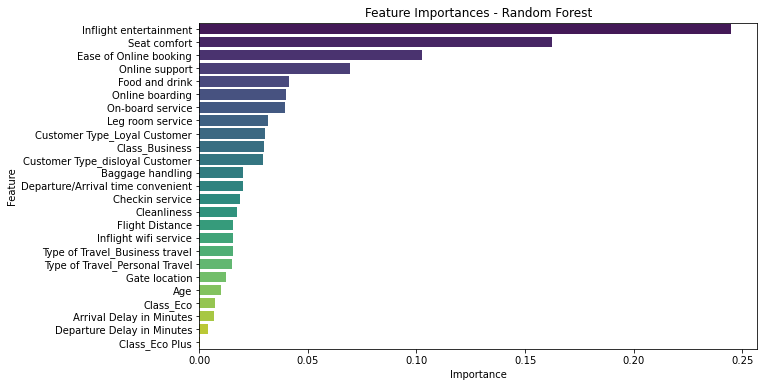

In [58]:
# Obtener importancias
importances = model_op.feature_importances_
features = X_train.columns 
feat_importances = pd.DataFrame({"feature": features, "importance": importances})

# Ordenar de mayor a menor importancia
feat_importances = feat_importances.sort_values(by="importance", ascending=False)

# Visualización
plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=feat_importances, palette="viridis")
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

[What is the Difference Between Test and Validation Datasets?,  Jason Brownlee](https://machinelearningmastery.com/difference-test-validation-datasets/)

[Decision Trees and Random Forests Neil Liberman](https://towardsdatascience.com/decision-trees-and-random-forests-df0c3123f991)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged